font size: 14.000000000000002


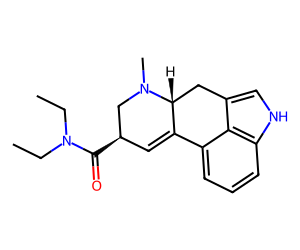

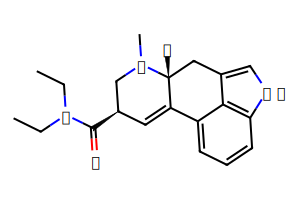

In [1]:
from rdkit import Chem
import emojichem
from IPython.display import SVG, display

mol = Chem.MolFromSmiles('CCN(CC)C(=O)[C@H]1CN([C@@H]2Cc3c[nH]c4c3c(ccc4)C2=C1)C')


drawer = Chem.Draw.rdMolDraw2D.MolDraw2DSVG(300, 250)
drawer.drawOptions().bgColor = None
drawer.drawOptions().fixedFontSize = 14
drawer.DrawMolecule(mol)
drawer.FinishDrawing()
print(f'font size: {drawer.FontSize()}')
display(SVG(drawer.GetDrawingText()))

emojichem.emoji_draw('CCN(CC)C(=O)[C@H]1CN([C@@H]2Cc3c[nH]c4c3c(ccc4)C2=C1)C')

In [2]:
!pip install mendeleev cairosvg

In [3]:
# getting indices printed in corct order
from mendeleev.fetch import fetch_table
df = fetch_table('elements')
emojis = '''🥐⏱🚨🍌🍟🔋⭐️
       ⌚️💊🎇🥛💥🛰
🔦🙈 🌀⚜️📺🚲
⛈🚛 🗺📸🚀🛳
👩‍👦👥 🤔🔍🎭🎨
☢️🍷 🌊💎⛓🍭
🔱🚬 ⚛️💻⚙️🍖
💣💉 ⚖️🖋🦄🥓
🌎🇪🇺 💃☄️🛣📼
👩🏻‍🔬🎰 🏰💰⚗️🍴
🎓🐳 👁‍🗨🥇🥈🥉
🌞💄 💫🌡🏭🌥
🐼🌆 🗾🐀📱🥄✈️🤹‍♀️
💯😬 📝🚰🤖🍺🖥⛽️
🙇🏽🍒 🏇🌈👁💀🌋🌱
🏅🌕 💡🦅🌌💅😷🔥
      🍅⚡️🐟🥜🤢🪥
       🔬🌪🔮🔫👻🎃🎈'''

In [4]:
emoji_dict = {}
for i,eg in enumerate(emojis.split('\n')):
    group = [e for e in list(eg[::-1]) if len(e) > 0 and e.encode() != b'\xef\xb8\x8f']
    for j,e in enumerate(group):
        if j >= len(df[df.group_id == i+1]):
            continue
        emoji_dict[df[df.group_id == i+1].iloc[j]['name'].lower()] = e
with open('emoji_dict.txt', 'w') as f:
    f.write(str(emoji_dict))